# Bài 1: So sánh và phân tích các bộ lọc làm mờ

In [ ]:
# Khai báo thư viện cần thiết
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

In [ ]:
# Thêm nhiễu
def add_salt_pepper(img, prob=0.02):
    noisy = img.copy()
    rnd = np.random.rand(*img.shape)
    noisy[rnd < (prob / 2)] = 0        # Pepper (đen)
    noisy[rnd > 1 - (prob / 2)] = 255  # Salt (trắng)
    return noisy

def add_gaussian_noise(img, mean=0, sigma=25):
    noise = np.random.normal(mean, sigma, img.shape)
    noisy = img + noise
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

In [ ]:
# Các bộ lọc làm mờ
def mean_filter(image, ksize=31):
    return cv2.blur(image, (ksize, ksize))

def gaussian_filter(image, ksize=31, sigma=30):
    return cv2.GaussianBlur(image, (ksize, ksize), sigma)

def median_filter(image, ksize=31):
    return cv2.medianBlur(image, ksize)

def bilateral_filter(image, d=15, sigmaColor=30, sigmaSpace=30):
    return cv2.bilateralFilter(image, d, sigmaColor, sigmaSpace)

In [ ]:
# Đánh giá chất lượng bằng psnr & ssim
def evaluate_filters(original, noisy, filtered):
    psnr_noisy = psnr(original, noisy, data_range=255)
    ssim_noisy = ssim(original, noisy, channel_axis=2, data_range=255)

    psnr_filtered = psnr(original, filtered, data_range=255)
    ssim_filtered = ssim(original, filtered, channel_axis=2, data_range=255)

    return {
        "PSNR (noisy)": psnr_noisy,
        "SSIM (noisy)": ssim_noisy,
        "PSNR (filtered)": psnr_filtered,
        "SSIM (filtered)": ssim_filtered
    }

In [ ]:
# Hiển thị histogram
def show_results(original, noisy, filtered, title):
    plt.figure(figsize=(12,6))

    # Hiển thị ảnh
    for i, (img, name) in enumerate(zip([original, noisy, filtered],
                                        ["Original", "Noisy", "Filtered"])):
        plt.subplot(2,3,i+1)
        plt.imshow(img)
        plt.title(name)
        plt.axis("off")

    # Hiển thị histogram
    for i, (img, name) in enumerate(zip([original, noisy, filtered],
                                        ["Original", "Noisy", "Filtered"])):
        plt.subplot(2,3,i+4)
        plt.hist(img.ravel(), bins=256, range=[0,256], color='gray')
        plt.title(f"{name} Histogram")

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

Gaussian Noise
Mean
{'PSNR (noisy)': 20.999383702828986, 'SSIM (noisy)': 0.15428243781416165, 'PSNR (filtered)': 27.253667442367583, 'SSIM (filtered)': 0.899560170077593}


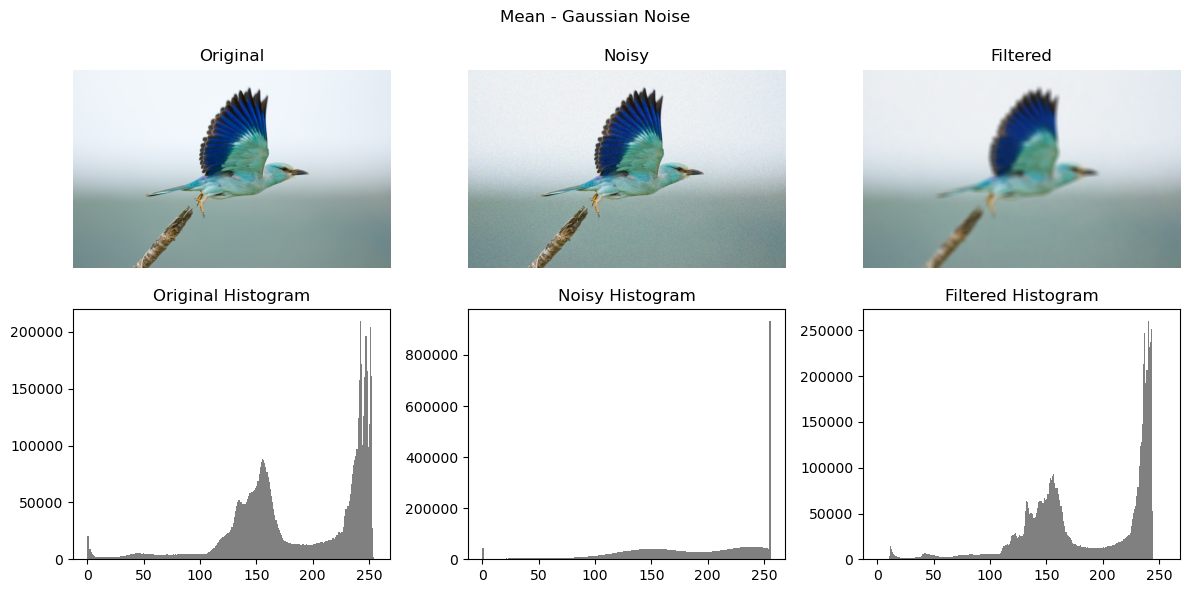

Gaussian
{'PSNR (noisy)': 20.999383702828986, 'SSIM (noisy)': 0.15428243781416165, 'PSNR (filtered)': 27.360464330227565, 'SSIM (filtered)': 0.900440458211011}


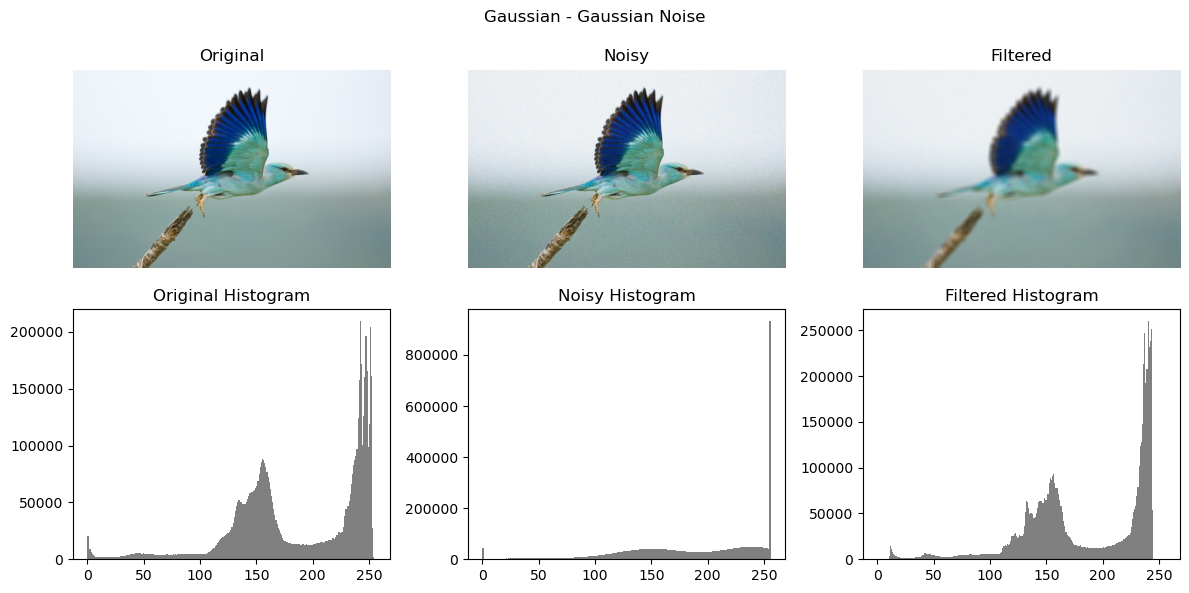

Median
{'PSNR (noisy)': 20.999383702828986, 'SSIM (noisy)': 0.15428243781416165, 'PSNR (filtered)': 28.828443539526504, 'SSIM (filtered)': 0.9074864708426151}


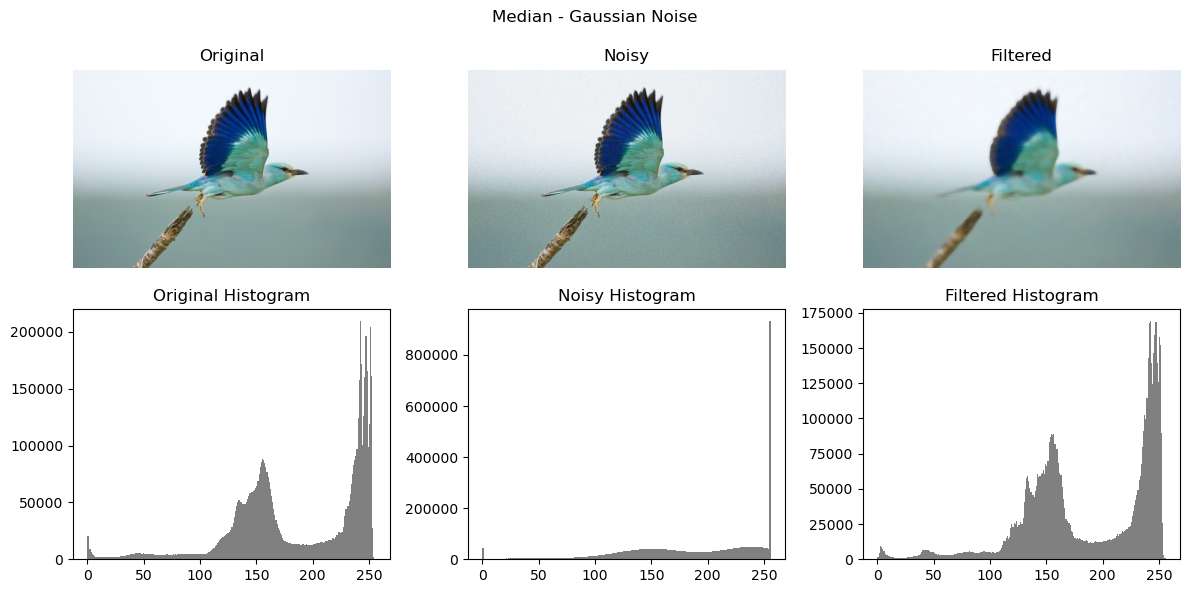

Bilateral
{'PSNR (noisy)': 20.999383702828986, 'SSIM (noisy)': 0.15428243781416165, 'PSNR (filtered)': 24.954178639323317, 'SSIM (filtered)': 0.3204805669214021}


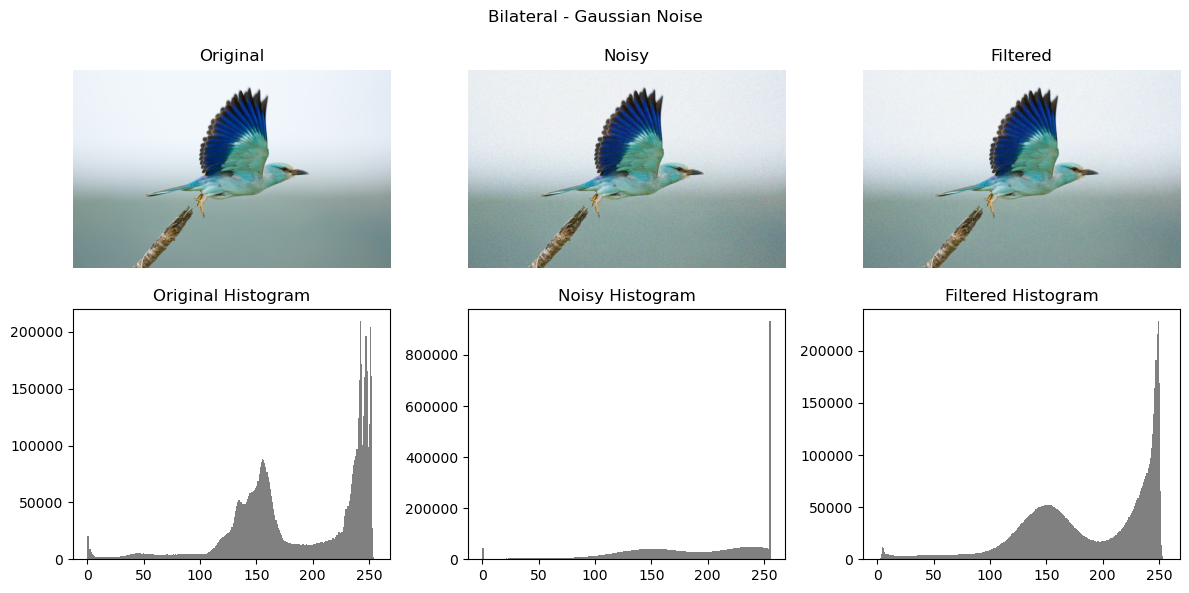

Salt & Pepper Noise
Mean {'PSNR (noisy)': 21.47961083480151, 'SSIM (noisy)': 0.5495794956359954, 'PSNR (filtered)': 27.756089063955244, 'SSIM (filtered)': 0.9012409683433886}


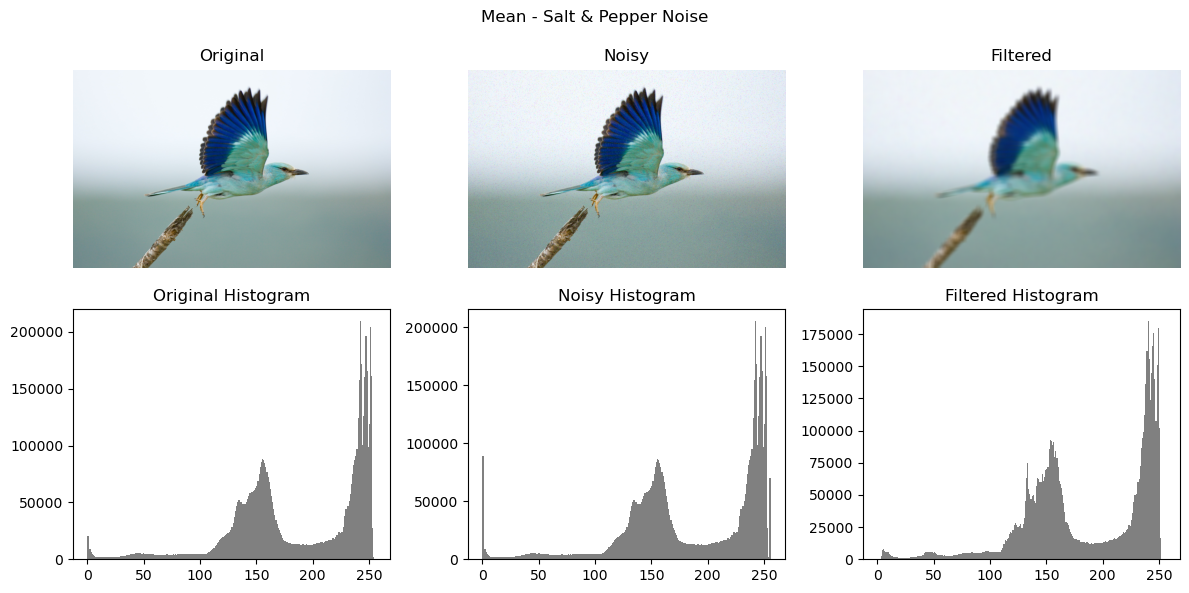

Gaussian {'PSNR (noisy)': 21.47961083480151, 'SSIM (noisy)': 0.5495794956359954, 'PSNR (filtered)': 27.875478339459434, 'SSIM (filtered)': 0.9021237864647627}


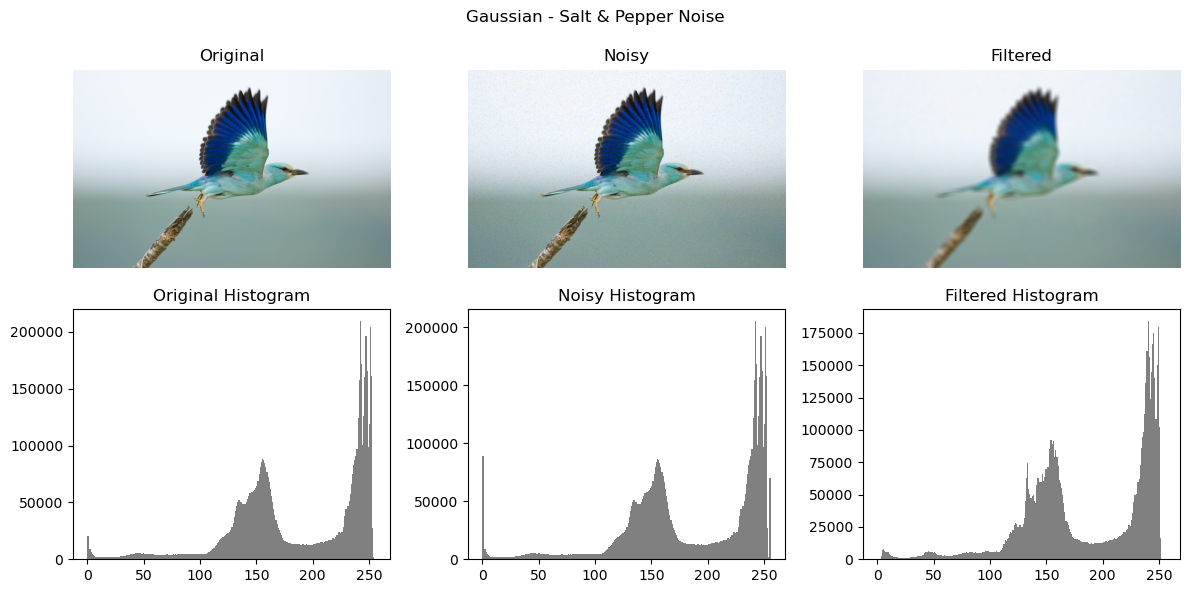

Median {'PSNR (noisy)': 21.47961083480151, 'SSIM (noisy)': 0.5495794956359954, 'PSNR (filtered)': 29.010902954184647, 'SSIM (filtered)': 0.9158747183644728}


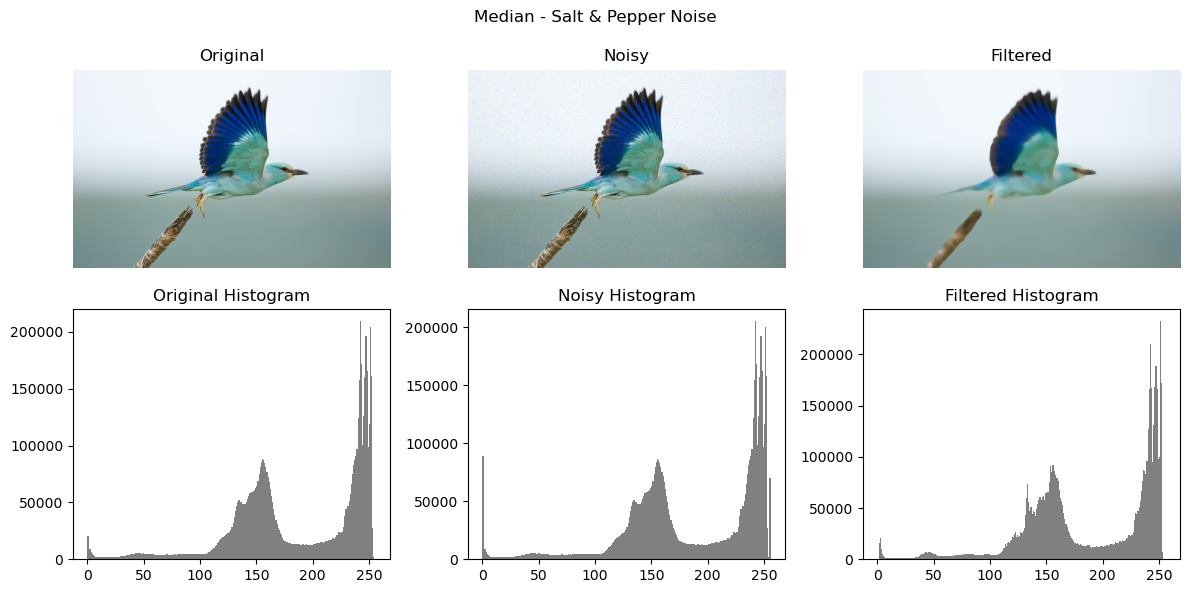

Bilateral {'PSNR (noisy)': 21.47961083480151, 'SSIM (noisy)': 0.5495794956359954, 'PSNR (filtered)': 21.567555125399846, 'SSIM (filtered)': 0.5574552437623664}


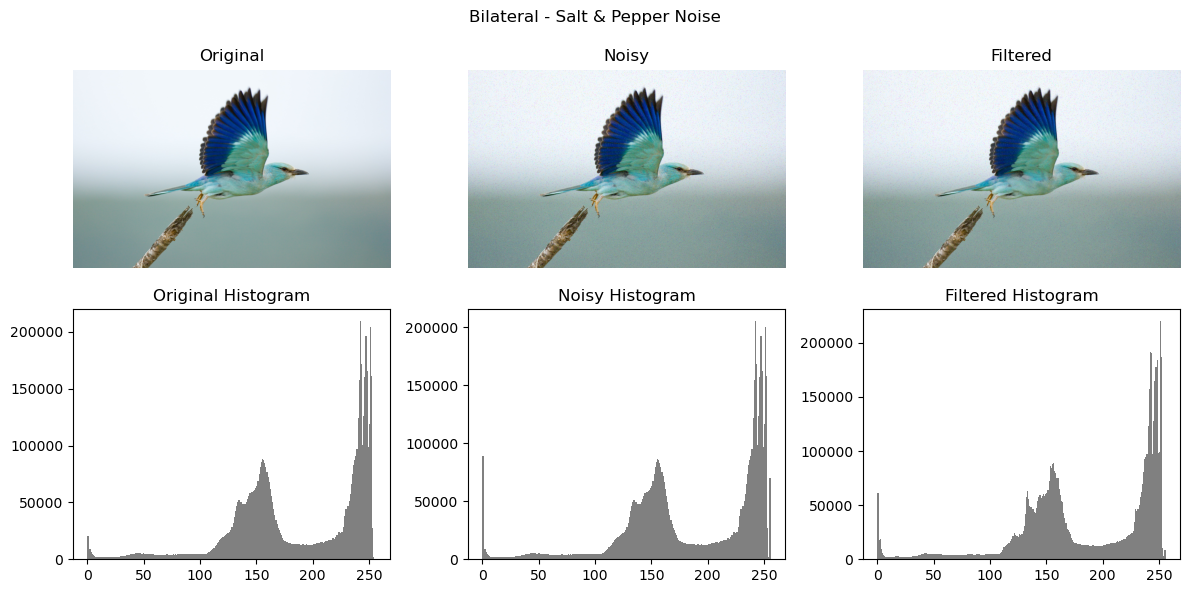

In [ ]:
# Test
def test_filters(image_path):
    original = cv2.imread(image_path)
    original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

    # Thêm nhiễu
    noise = np.random.normal(0, 25, original.shape)
    noise_img = original + noise
    noisy_gauss = np.clip(noise_img, 0, 255).astype(np.uint8)
    noisy_sp = add_salt_pepper(original)

    filters = {
        "Mean": mean_filter,
        "Gaussian": gaussian_filter,
        "Median": median_filter,
        "Bilateral": bilateral_filter
    }

    # Gaussian Noise
    print("Gaussian Noise")
    for name, f in filters.items():
        filtered = f(noisy_gauss)
        metrics = evaluate_filters(original, noisy_gauss, filtered)
        print(f"{name}")
        print(f"{metrics}")
        show_results(original, noisy_gauss, filtered, f"{name} - Gaussian Noise")

    # Salt & Pepper Noise
    print("Salt & Pepper Noise")
    for name, f in filters.items():
        filtered = f(noisy_sp)
        metrics = evaluate_filters(original, noisy_sp, filtered)
        print(name, metrics)
        show_results(original, noisy_sp, filtered, f"{name} - Salt & Pepper Noise")


test_filters("img/Anh_Dong_Vat.jpg")